<a href="https://colab.research.google.com/github/Tanishall22atat/Codsoft-Machine-Learning/blob/main/myChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv(next(iter(uploaded)))




Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X = pd.get_dummies(X, drop_first=True)



In [ ]:
# Separate features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

print(f"Features prepared. Total columns: {X.shape[1]}")


Features prepared. Total columns: 15


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale numeric features only
num_features = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

print("Data split and scaled.")


Data split and scaled.


In [ ]:
lr = LogisticRegression(random_state=42, max_iter=500)

param_dist_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

search_lr = RandomizedSearchCV(lr, param_distributions=param_dist_lr,
                               n_iter=4, cv=3, scoring='roc_auc', random_state=42)
search_lr.fit(X_train, y_train)
best_lr = search_lr.best_estimator_

print("Logistic Regression trained. Best Params:", search_lr.best_params_)


Logistic Regression trained. Best Params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


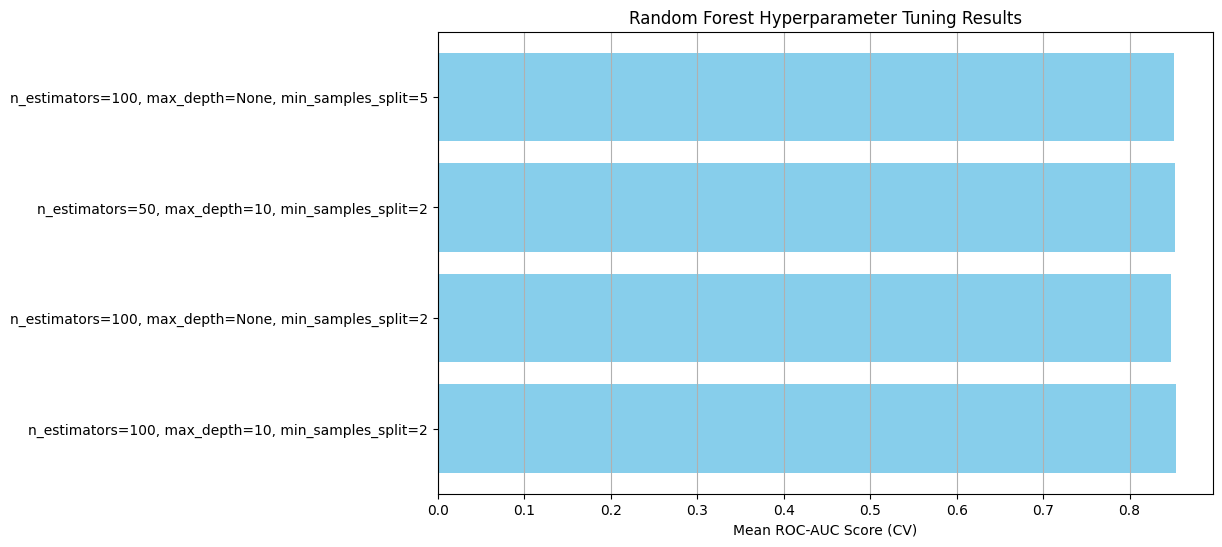

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract results into a DataFrame
cv_results = pd.DataFrame(search_rf.cv_results_)

# Show the parameters and mean test scores
params = cv_results['params']
mean_test_scores = cv_results['mean_test_score']

# Create a readable label for each parameter set
labels = [f"n_estimators={p['n_estimators']}, max_depth={p['max_depth']}, min_samples_split={p['min_samples_split']}"
          for p in params]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(labels, mean_test_scores, color='skyblue')
plt.xlabel('Mean ROC-AUC Score (CV)')
plt.title('Random Forest Hyperparameter Tuning Results')
plt.grid(axis='x')
plt.show()


In [ ]:
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

print(" Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))


 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.68      0.31      0.43       393

    accuracy                           0.84      2000
   macro avg       0.76      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000

Confusion Matrix:
 [[1548   59]
 [ 270  123]]
ROC-AUC Score: 0.7951345180357564


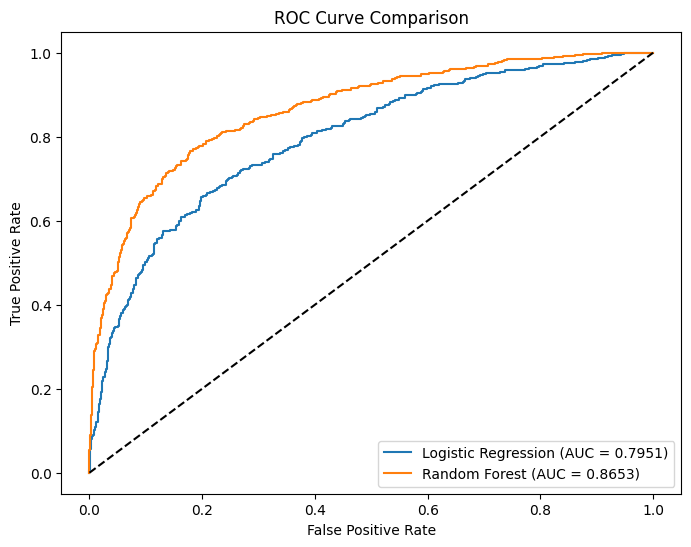

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use the correct variable names for predicted probabilities
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_lr):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob_rf):.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
